In [2]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np
import pyAgrum as gum


#Whether or not a goal is scored
# Create a Bayesian Network
bn = gum.BayesNet('Expected Goal')

# Add chance nodes (random variables)
assist_type = bn.add(gum.LabelizedVariable("assist_type", "assist_type", ['Pass', 'Cross','Through_Ball']))
situation = bn.add(gum.LabelizedVariable("situation", "situation", ['Open_Play', 'Counter_Attack','Set_Piece'])) # Open_Play, Counter_Attack, Set_Piece
body_part = bn.add(gum.LabelizedVariable("body_part", "body_part", ['Feet', 'Head'])) #Feet ,  Head
location = bn.add(gum.LabelizedVariable("location", "location", ['Central_Zone', 'Wide_Zone','Difficult_Angle_Zone', 'Long_Range_Zone' ])) #Central_Zone:(centre of the box and penalty spot),Wide_Zone(left-wing, right-wing,left side of the six-yard box, right side of the box, and right side of the six-yard box),Difficult_Angle_Zone(difficult angle and long-range, difficult angle on the left, and difficult angle on the right),Long_Range_Zone(long-range, more than 35 yards, and more than 40 yards)
shot_on_target = bn.add(gum.LabelizedVariable("shot_on_target", "shot_on_target", ['No', 'Yes'])) 
is_goal = bn.add(gum.LabelizedVariable("is_goal", "is_goal", ['No', 'Yes'])) 
goal_keeper_position = bn.add(gum.LabelizedVariable("goal_keeper_position", "goal_keeper_position", ['Good', 'Average', 'Bad'])) # Good positioning, avergage poisitioning, Bad positioning(Far Off)
offsideflag = bn.add(gum.LabelizedVariable("offsideflag", "offsideflag", ['Up', 'Down'])) #FlagUp (No Goal) ,  Flag Down(Goal)
# Add arcs (directed edges) between nodes
bn.addArc(situation, location)
bn.addArc(assist_type, body_part)
bn.addArc(body_part, location)
bn.addArc(location, shot_on_target)
bn.addArc(body_part, shot_on_target)
bn.addArc(assist_type, shot_on_target)
bn.addArc(situation, shot_on_target)

bn.addArc(shot_on_target,is_goal)
bn.addArc(goal_keeper_position,is_goal)
bn.addArc(offsideflag, is_goal)

bn.cpt(offsideflag).fillWith([0.05,0.95]) # flag up, flag down

bn.cpt(goal_keeper_position).fillWith([0.6, 0.3, 0.2])  # good positioning, Average positioning , Bad(Far off )positioning
bn.cpt(assist_type).fillWith([0.5, 0.2, 0.3]) # Pass, Cross, Throughl Ball

bn.cpt(situation).fillWith([0.8, 0.1, 0.1]) # Open_Play, Counter_Attack, Set_Piece

bn.cpt(body_part)[{'assist_type': 'Pass'}] = [0.8, 0.2]
bn.cpt(body_part)[{'assist_type': 'Cross'}] = [0.3, 0.7]
bn.cpt(body_part)[{'assist_type': 'Through_Ball'}] = [0.95, 0.05]
#Situation: Open_Play, Body_part: Feet
bn.cpt(location)[{'situation': 'Open_Play', 'body_part': 'Feet'}] = [0.4, 0.4, 0.15, 0.05] # Central_Zone, Wide_Zone, Difficult_Angle_Zone, Long_Range_Zone

#Situation: Open_Play, Body_part: Head
bn.cpt(location)[{'situation': 'Open_Play', 'body_part': 'Head'}] = [0.7, 0.25, 0.04, 0.01] # Central_Zone, Wide_Zone, Difficult_Angle_Zone, Long_Range_Zone

#Situation: Counter_Attack, Body_part: Feet
bn.cpt(location)[{'situation': 'Counter_Attack', 'body_part': 'Feet'}] = [0.3, 0.5, 0.15, 0.05] # Central_Zone, Wide_Zone, Difficult_Angle_Zone, Long_Range_Zone

#Situation: Counter_Attack, Body_part: Head
bn.cpt(location)[{'situation': 'Counter_Attack', 'body_part': 'Head'}] = [0.6, 0.3, 0.08, 0.02] # Central_Zone, Wide_Zone, Difficult_Angle_Zone, Long_Range_Zone

#Situation: Set_Piece, Body_part: Feet
bn.cpt(location)[{'situation': 'Set_Piece', 'body_part': 'Feet'}] = [0.35, 0.35, 0.2, 0.1] # Central_Zone, Wide_Zone, Difficult_Angle_Zone, Long_Range_Zone

#Situation: Set_Piece, Body_part: Head
bn.cpt(location)[{'situation': 'Set_Piece', 'body_part': 'Head'}] = [0.8, 0.15, 0.04, 0.01] # Central_Zone, Wide_Zone, Difficult_Angle_Zone, Long_Range_Zone

# Situation: Open_Play, Assist_type: Pass
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.1, 0.9]  # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.2, 0.8]  # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.7, 0.3]  # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.95, 0.05]  # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.15, 0.85]  # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.3, 0.7]  # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.9, 0.1]  # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.99, 0.01]  # Head, Long_Range_Zone

# Situation: Open_Play, Assist_type: Cross
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.6, 0.4]  # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.4, 0.6]  # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.8, 0.2]  # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Feet', 'location':'Long_Range_Zone'}] = [0.98, 0.02]  # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.05, 0.95]  # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.15, 0.85]  # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.95, 0.05]  # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.99, 0.01]  # Head, Long_Range_Zone

# Situation: Open_Play, Assist_type: Through_Ball
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part':'Feet', 'location': 'Central_Zone'}] = [0.1, 0.9]  # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.3, 0.7]  # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.85, 0.15]  # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.97, 0.03]  # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.2, 0.8]  # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.4, 0.6]  # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.95, 0.05]  # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Open_Play', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.99, 0.01]  # Head, Long_Range_Zone

# Situation: Counter_Attack, Assist_type: Pass
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.25, 0.75]  # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.08, 0.92]  # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.8, 0.2]  # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.95, 0.05]  # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.2, 0.8]  # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.4, 0.6]  # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.9, 0.1]  # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.98, 0.02]  # Head, Long_Range_Zone

#Situation: Counter_Attack, Assist_type: Cross
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.15, 0.85] # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.35, 0.65] # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.75, 0.25] # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.96, 0.04] # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.05, 0.95] # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.12, 0.88] # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.94, 0.06] # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.99, 0.01] # Head, Long_Range_Zone


#Situation: Counter_Attack, Assist_type: Through_Ball
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.05, 0.95] # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.2, 0.8] # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.8, 0.2] # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.97, 0.03] # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.3, 0.7] # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.5, 0.5] # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.95, 0.05] # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Counter_Attack', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.99, 0.01] # Head, Long_Range_Zone

#Situation: Set_Piece, Assist_type: Pass
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.3, 0.7] # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.9, 0.1] # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.15, 0.85] # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.98, 0.02] # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.1, 0.9] # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.25, 0.75] # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.95, 0.05] # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Pass', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.99, 0.01] # Head, Long_Range_Zone

# Situation: Set_Piece, Assist_type: Cross
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.7, 0.3]  # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.5, 0.5]  # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.85, 0.15]  # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.98, 0.02]  # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.2, 0.8]  # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.6, 0.4]  # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.9, 0.1]  # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Cross', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.99, 0.01]  # Head, Long_Range_Zone

# Situation: Set_Piece, Assist_type: Through_Ball
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Central_Zone'}] = [0.15, 0.85]  # Feet, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Wide_Zone'}] = [0.4, 0.6]  # Feet, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Difficult_Angle_Zone'}] = [0.8, 0.2]  # Feet, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Feet', 'location': 'Long_Range_Zone'}] = [0.95, 0.05]  # Feet, Long_Range_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Central_Zone'}] = [0.2, 0.8]  # Head, Central_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Wide_Zone'}] = [0.3, 0.7]  # Head, Wide_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Difficult_Angle_Zone'}] = [0.9, 0.1]  # Head, Difficult_Angle_Zone
bn.cpt(shot_on_target)[{'situation': 'Set_Piece', 'assist_type': 'Through_Ball', 'body_part': 'Head', 'location': 'Long_Range_Zone'}] = [0.98, 0.02]  # Head, Long_Range_Zone

bn.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Good', 'offsideflag': 'Up'}] = [1, 0] # No shot on target, good goalkeeper positioning, offside flag up
bn.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Good', 'offsideflag': 'Down'}] = [1, 0] # No shot on target, good goalkeeper positioning, offside flag down
bn.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Average', 'offsideflag': 'Up'}] = [1, 0] # No shot on target, average goalkeeper positioning, offside flag up
bn.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Average', 'offsideflag': 'Down'}] = [1, 0] # No shot on target, average goalkeeper positioning, offside flag down
bn.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Bad', 'offsideflag': 'Up'}] = [1, 0] # No shot on target, bad goalkeeper positioning, offside flag up
bn.cpt(is_goal)[{'shot_on_target': 'No', 'goal_keeper_position': 'Bad', 'offsideflag': 'Down'}] = [1, 0] # No shot on target, bad goalkeeper positioning, offside flag down

bn.cpt(is_goal)[{'shot_on_target': "Yes", 'goal_keeper_position': 'Good', 'offsideflag': 'Up'}] = [1, 0] # Shot on target, good goalkeeper positioning, offside flag up
bn.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Good', 'offsideflag': 'Down'}] = [0.6, 0.4] # Shot on target, good goalkeeper positioning, offside flag down
bn.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Average', 'offsideflag': 'Up'}] = [1, 0] # Shot on target, average goalkeeper positioning, offside flag up
bn.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Average', 'offsideflag': 'Down'}] = [0.3, 0.7] # Shot on target, average goalkeeper positioning, offside flag down
bn.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Bad', 'offsideflag': 'Up'}] = [1, 0] # Shot on target, bad goalkeeper positioning, offside flag up
bn.cpt(is_goal)[{'shot_on_target': 'Yes', 'goal_keeper_position': 'Bad', 'offsideflag': 'Down'}] = [0.15, 0.85] # Shot on target, bad goalkeeper positioning, offside flag down

bn



(pyAgrum.BayesNet<double>@0x7fee97ac5c00) BN{nodes: 8, arcs: 10, domainSize: 1728, dim: 112, mem: 1Ko 648o}

In [7]:
bn.cpt("shot_on_target")


(pyAgrum.Potential<double>@0x60000013a620) 
             ||  location                             |
situat|body_p||Central_Z|Wide_Zone|Difficult|Long_Rang|
------|------||---------|---------|---------|---------|
Open_P|Feet  || 0.4000  | 0.4000  | 0.1500  | 0.0500  |
Counte|Feet  || 0.3000  | 0.5000  | 0.1500  | 0.0500  |
Set_Pi|Feet  || 0.3500  | 0.3500  | 0.2000  | 0.1000  |
Open_P|Head  || 0.7000  | 0.2500  | 0.0400  | 0.0100  |
Counte|Head  || 0.6000  | 0.3000  | 0.0800  | 0.0200  |
Set_Pi|Head  || 0.8000  | 0.1500  | 0.0400  | 0.0100  |

In [ ]:
bn.cpt("location")

In [8]:
bn.cpt("situation")

(pyAgrum.Potential<double>@0x60000013a3e0) 
  situation                  |
Open_Play|Counter_A|Set_Piece|
---------|---------|---------|
 0.8000  | 0.1000  | 0.1000  |

In [9]:
bn.cpt("assist_type")

(pyAgrum.Potential<double>@0x60000013a2a0) 
  assist_type                |
Pass     |Cross    |Through_B|
---------|---------|---------|
 0.5000  | 0.2000  | 0.3000  |

In [10]:
bn.cpt("body_part")

(pyAgrum.Potential<double>@0x60000013a4e0) 
      ||  body_part        |
assist||Feet     |Head     |
------||---------|---------|
Pass  || 0.8000  | 0.2000  |
Cross || 0.3000  | 0.7000  |
Throug|| 0.9500  | 0.0500  |

In [11]:
bn.cpt("goal_keeper_position")

(pyAgrum.Potential<double>@0x60000013a960) 
  goal_keeper_position       |
Good     |Average  |Bad      |
---------|---------|---------|
 0.6000  | 0.3000  | 0.2000  |

In [13]:
bn.cpt("offsideflag")

(pyAgrum.Potential<double>@0x60000013aa60) 
  offsideflag      |
Up       |Down     |
---------|---------|
 0.0500  | 0.9500  |

In [14]:
bn.cpt("is_goal")

(pyAgrum.Potential<double>@0x60000013a820) 
                    ||  is_goal          |
shot_o|goal_k|offsid||No       |Yes      |
------|------|------||---------|---------|
No    |Good  |Up    || 1.0000  | 0.0000  |
Yes   |Good  |Up    || 1.0000  | 0.0000  |
No    |Averag|Up    || 1.0000  | 0.0000  |
Yes   |Averag|Up    || 1.0000  | 0.0000  |
No    |Bad   |Up    || 1.0000  | 0.0000  |
Yes   |Bad   |Up    || 1.0000  | 0.0000  |
No    |Good  |Down  || 1.0000  | 0.0000  |
Yes   |Good  |Down  || 0.6000  | 0.4000  |
No    |Averag|Down  || 1.0000  | 0.0000  |
Yes   |Averag|Down  || 0.3000  | 0.7000  |
No    |Bad   |Down  || 1.0000  | 0.0000  |
Yes   |Bad   |Down  || 0.1500  | 0.8500  |

In [4]:
ie = gum.LazyPropagation(bn)
from IPython.core.display import HTML
ie.posterior("body_part")[:]
gnb.sideBySide(gnb.getInference(bn,evs={'assist_type':'Pass' ,'situation':0, 'body_part': 0, 'location': 0} ),
            gnb.getInference(bn,evs={'assist_type':'Cross','situation':0, 'body_part': 0, 'location': 0}),
            gnb.getInference(bn,evs={'assist_type':'Through_Ball','situation':0, 'body_part': 0, 'location': 0}),
            ncols=3)

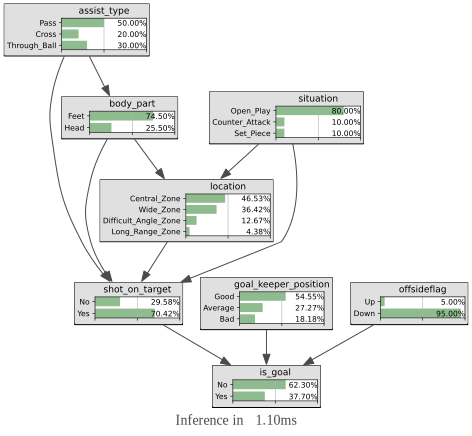

In [5]:
ie = gum.VariableElimination(bn)
gnb.showInference(bn, evs={}, engine=ie)

In [6]:
ie = gum.LazyPropagation(bn)
from IPython.core.display import HTML
ie.posterior("body_part")[:]
gnb.sideBySide(gnb.getInference(bn,evs={'body_part':'Feet'}),
            gnb.getInference(bn,evs={'body_part':'Head'}),
            ncols=2)